In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"..\out\Polizeiberichte_transformed.csv", sep=";", encoding="UTF-8")

In [3]:
data.columns

Index(['Timestamp', 'Ueberschrift', 'Hauptartikel', 'Link', 'Datum', 'Ort',
       'Sekundaerer Ort', 'Author', 'Ueberschrift_clean', 'Ueberschrift_lem',
       'Ueberschrift_lem_no_stop', 'Ueberschrift_split', 'Ueberschrift_clean2',
       'Ueberschrift_lem2', 'Ueberschrift_lem_clean2',
       'Ueberschrift_lem_clean_no_stop', 'Ueberschrift_kombi',
       'Hauptartikel_clean', 'Hauptartikel_lem', 'Hauptartikel_lemm_clean',
       'Hauptartikel_lem_clean_no_stop'],
      dtype='object')

In [4]:
data["text"] = data["Ueberschrift_clean"] + data["Hauptartikel_clean"]

In [5]:
data = data[["text", "Author"]]
data = data[data["Author"].isin(["as", "em", "fue", "ka", "mc", "ne", "re", "va", "we"])]

In [6]:
data.groupby(by="Author").count()

,text
Author,
as,422
em,758
fue,1084
ka,591
mc,534
ne,500
re,169
va,141
we,138


In [7]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import classification_report, confusion_matrix

In [8]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data["text"])
X_counts.shape

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

Y = data["Author"]

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X_counts, Y, test_size=0.95, random_state = 0)

In [10]:
clf_svc = SVC(kernel="linear", probability=True)
#cross_val_score(clf_svc, X_tfidf, Y, cv=5)

In [11]:
clf_svc.fit(X_tfidf, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
import pickle
filename_model = 'SVC_author_classifier.pkl'
SVC_model_pickle = open(filename_model, 'wb')
pickle.dump(clf_svc, SVC_model_pickle)
SVC_model_pickle.close()

filename_count = 'count_transformer.pkl'
count_pickle = open(filename_count, 'wb')
pickle.dump(count_vect, count_pickle)
count_pickle.close()

filename_tfidf = 'tfidf_transformer.pkl'
tfidf_pickle = open(filename_tfidf, 'wb')
pickle.dump(tfidf_transformer, tfidf_pickle)
transformer_pickle.close()

In [22]:
import seaborn as sns

In [24]:
new_text = r"Am Dienstag, den 15. Januar 2019, gegen 06.25 Uhr, befuhr ein 51-Jähriger mit seinem Motorroller die Straße Am Hauptbahnhof, vom Baseler Platz kommend und wollte nach links, in die Poststraße abbiegen. Plötzlich kam aus Richtung Bahnhofsviertel ein Radfahrer auf die Straße gefahren und kollidierte mit dem Rollerfahrer. Beide Personen stürzten zu Boden. Der 51-Jährige wurde bei dem Unfall leicht verletzt. Der Radfahrer verblieb zunächst noch einige Minuten am Unfallort, nutzte jedoch dann eine für ihn günstige Gelegenheit zur Flucht über die Gleise der Straßenbahn in Richtung Hauptbahnhof. Das von ihm benutzte Fahrrad ließ er zurück. Der Unfall konnte von einer Videokamera aufgezeichnet werden. Ein Bild des Fahrrades ist dieser Meldung beigefügt. Die Polizei bittet Personen, die sachdienliche Hinweise zu dem Fahrrad geben können, sich mit dem 4. Polizeirevier unter der Telefonnummer 069-75510400 in Verbindung zu setzen."

new_text_transf = tfidf_transformer.transform(count_vect.transform([new_text]))

In [25]:
probas = clf_svc.predict_proba(new_text_transf)[0]

In [26]:
plotdata = pd.DataFrame()
plotdata["class"] = clf_svc.classes_
plotdata["probas"] = probas

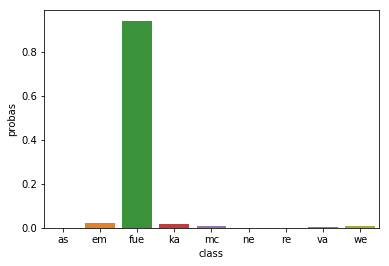

In [27]:
sns.barplot(x="class", y="probas", data=plotdata)